In [1]:
import numpy as np

In [2]:
def hinge_loss(z):
    if z >= 1:
        return 0
    else:
        return 1 - z
    
def Rn(X, y, theta, lossfunc):
    n = X.shape[0]
    d = X.shape[1]
    sum = 0
    
    for t in range(n):
        z = y[t] - np.dot(theta, X[t, :])
        sum += lossfunc(z)
    
    return sum / n

def squared_loss(z):
    return z**2 / 2

In [3]:
X = np.array([
    [1, 0, 1],
    [1, 1, 1],
    [1, 1, -1],
    [-1, 1, 1]
])

y = np.array([2, 2.7, -0.7, 2])

theta = np.array([0, 1, 2])

Rn(X, y, theta, hinge_loss)

1.25

In [4]:
Rn(X, y, theta, squared_loss)

0.1475

In [5]:
def RBK(arr1, arr2):
    return np.exp(-1/2 * np.linalg.norm(arr1 - arr2)**2)

In [6]:
arr1 = np.array([1, 0, 0])
arr2 = np.array([0, 1, 0])
RBK(arr1, arr2)

0.3678794411714422

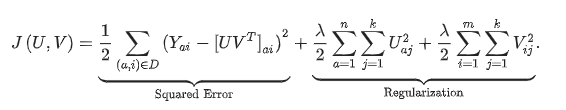

In [7]:
import sympy as sy

def find_U(X, V, k=1, Lambda=1):
    n = X.shape[0]  # num of rows
    p = X.shape[1]  # num of cols
    
    U = sy.Matrix(sy.symbols([f"u_{i}" for i in range(1, n+1)]))
    
    # First step (create the first X)
    for i in range(n):
        J_prime = 0  # initialize derivative of loss function to 0
        for j in range(p):
            if X[i, j] is not None:
                # print("Params:")
                # print(f"  X_{i}{j} =", X[i, j])
                # print(f"  U_{i} =", U[i])
                # print(f"  V_{j} =", V[j])
                J_prime += (X[i, j] - V[j]*U[i]) * -V[j]
                # print("J_prime_delta =", (X[i, j] - V[j]*U[i]) * -V[j])
                # print("Cumulative J_prime =", J_prime)
        J_prime += Lambda * U[i]
        # print("    FINAL J_prime =", J_prime)
        # print("-"*40)
        # Set the derivative to zero to solve for the unknown u_i
        solutions = sy.solve(J_prime, U[i])
        if solutions:
            U[i] = solutions[0]  # Take the first solution
        else:
            raise ValueError(f"No solution found for U[{i}]")
    return U

In [8]:
Y = np.array([
    [5, None, 7],
    [None, 2, None],
    [4, None, None],
    [None, 3, 6]
])

X = np.array([[24, 12, 6], [0, 0, 0], [12, 6, 3], [24, 12, 6]])

V = np.array([4, 2, 1])

find_U(X, V)

Matrix([
[63/11],
[    0],
[63/22],
[63/11]])

In [9]:
u1 = sy.Symbol("u_1")

J_prime = (24 - 4*u1)*(-4) + (12-2*u1)*(-2) + (6-u1)*(-1) + u1
J_prime

22*u_1 - 126

In [10]:
sy.solve(J_prime, u1)[0]

63/11

In [11]:
u3 = sy.Symbol("u_3")

J_prime = (12 - 4*u3)*(-4) + (6-2*u3)*(-2) + (3-u3)*(-1) + u3
J_prime

22*u_3 - 63

In [12]:
sy.solve(J_prime, u3)[0]

63/22

In [13]:
u4 = sy.Symbol("u_4")

J_prime = (24 - 4*u4)*(-4) + (12 - 2*u4)*(-2) + (6-u4)*(-1) + u4
J_prime

22*u_4 - 126

In [14]:
sy.solve(J_prime, u4)[0]

63/11

In [15]:
import numpy as np
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt

In [16]:
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

y = np.array([-1, 1, 1])

SVM = LinearSVC()
params = SVM.fit(X, y)
theta = params.coef_[0]
theta0 = params.intercept_
print("theta =", theta)
print("theta0 =", theta0)
SVM.predict(X)

theta = [ 0.64576381  0.15263047 -0.34050286]
theta0 = [-0.49313333]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([-1,  1,  1])

In [17]:
y_hat = X @ theta + theta0
y_hat

array([-0.56361714,  0.81005713,  2.1837314 ])

In [24]:
c = np.array([1, 2, 3])
A = np.array([
    [1, 1, 1],
    [2, 2, 2],
    [3, 3, 3]
])

c = np.tile(c, (A.shape[0], 1))
c

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])